In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
df = pd.read_csv('/kaggle/input/titanic-survive-model/titanic-passengers.csv', sep=';')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S


In [2]:
# Data preprocessing
df['Age'].fillna(df['Age'].median(), inplace=True)
df.dropna(subset=['Embarked'], inplace=True)

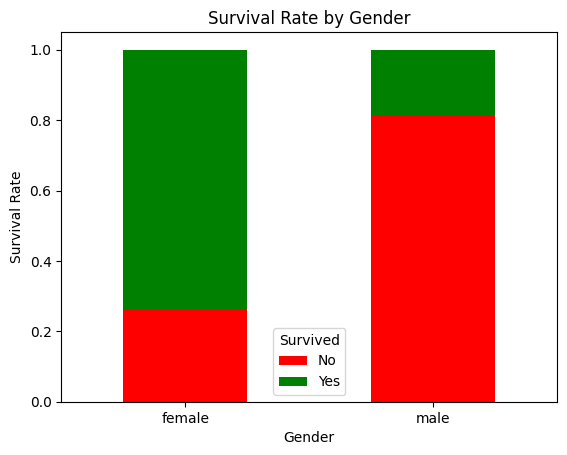

In [3]:
# Survival rate by gender
gender_survival = df.groupby('Sex')['Survived'].value_counts(normalize=True).unstack()
gender_survival.plot(kind='bar', stacked=True, color=['red', 'green'])
plt.title('Survival Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Survival Rate')
plt.xticks(rotation=0)
plt.show()

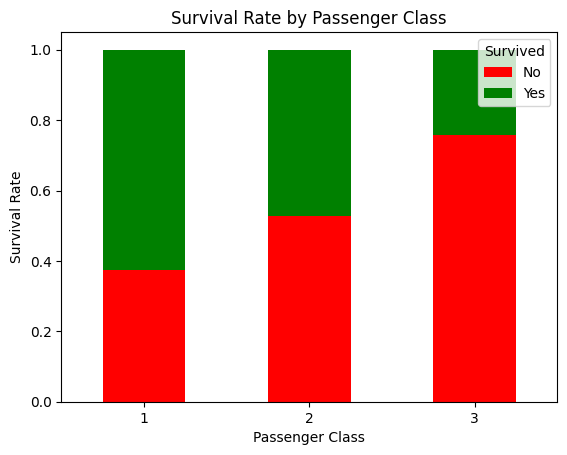

In [4]:
# Survival rate by passenger class
class_survival = df.groupby('Pclass')['Survived'].value_counts(normalize=True).unstack()
class_survival.plot(kind='bar', stacked=True, color=['red', 'green'])
plt.title('Survival Rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.xticks(rotation=0)
plt.show()

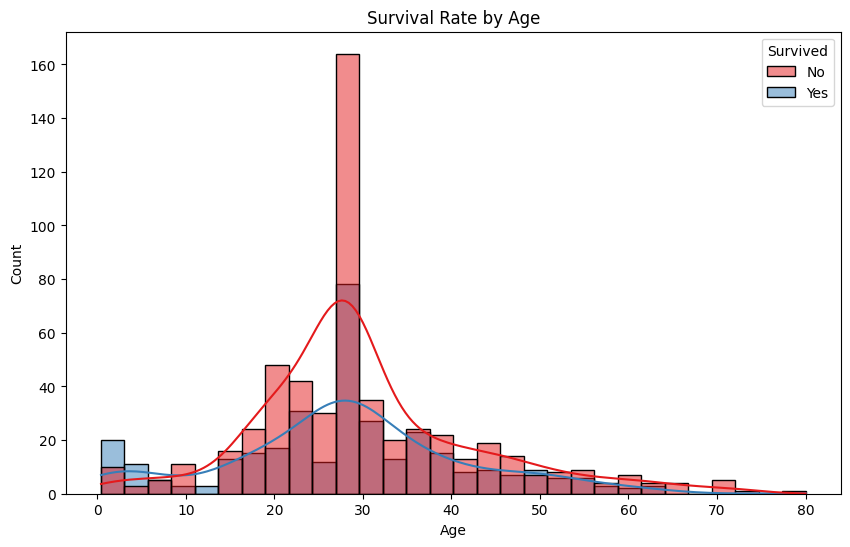

In [5]:
# Survival rate by age
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Age', hue='Survived', kde=True, palette='Set1', bins=30)
plt.title('Survival Rate by Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

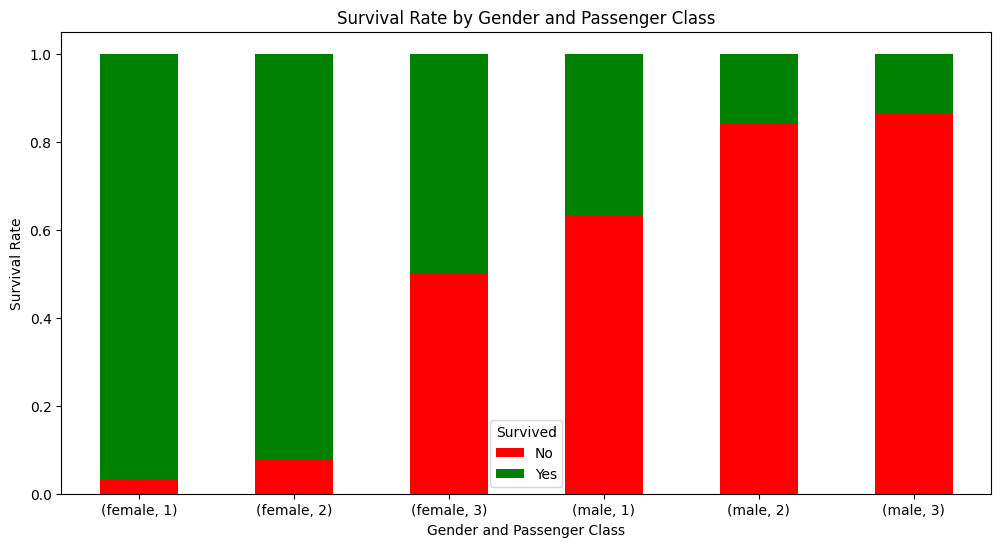

In [6]:
# Survival rate by gender and class
gender_class_survival = df.groupby(['Sex', 'Pclass'])['Survived'].value_counts(normalize=True).unstack()
gender_class_survival.plot(kind='bar', stacked=True, color=['red', 'green'], figsize=(12, 6))
plt.title('Survival Rate by Gender and Passenger Class')
plt.xlabel('Gender and Passenger Class')
plt.ylabel('Survival Rate')
plt.xticks(rotation=0)
plt.show()